2024-03-15 05:11:20.364986: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-15 05:11:20.365118: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-15 05:11:20.547840: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


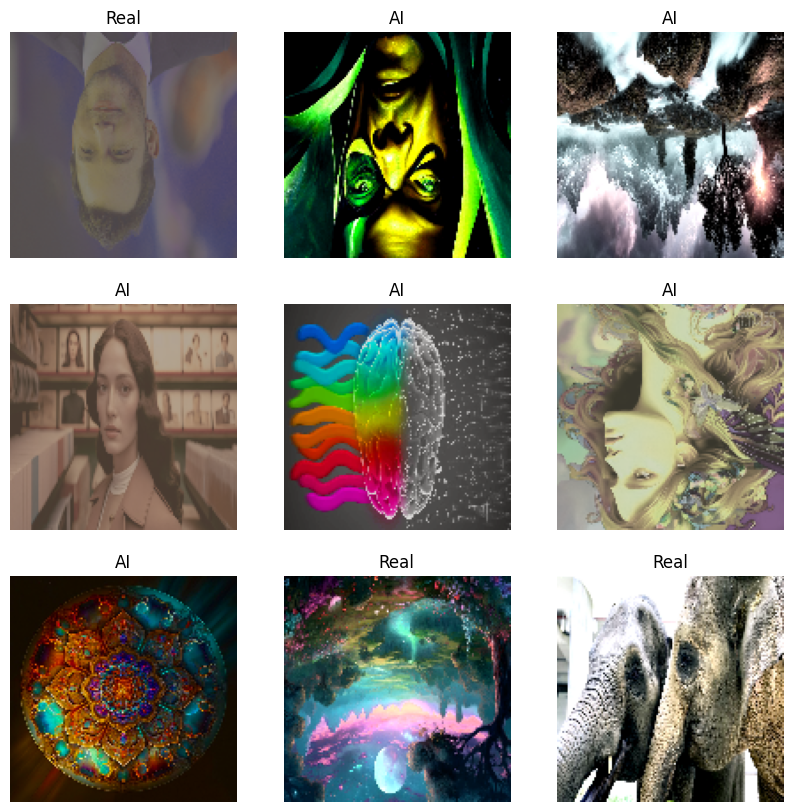

In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

# DATA PATH
ai_image_dir = r"/kaggle/input/ai-generated-images-vs-real-images/AiArtData/AiArtData"
real_image_dir = r"/kaggle/input/ai-generated-images-vs-real-images/RealArt/RealArt"

#  FUNCTION TO LOAD AND PREPROCESS IMAGE
def preprocess_image(image_path, target_size=(128, 128)):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, target_size)
    image = tf.image.random_flip_left_right(image)  
    image = tf.image.random_flip_up_down(image)     
    image = tf.image.random_brightness(image, max_delta=0.2)  
    image = tf.image.random_contrast(image, lower=0.2, upper=1.8)  
    image = tf.image.random_saturation(image, lower=0.2, upper=1.8)  
    image = tf.image.random_hue(image, max_delta=0.1) 
    image = tf.clip_by_value(image, 0, 255)  
    image = image / 255.0  
    return image

#FUNCTION TO LOAD IMAGE FROM DIRECTORY  AND PREPROCESS THEM 
def load_and_preprocess_images(image_dir):
    image_paths = [os.path.join(image_dir, filename) for filename in os.listdir(image_dir)]
    images = [preprocess_image(image_path) for image_path in image_paths]
    return images

#LOAD AND PREPROCESS AI-GENERATED IMAGES 
ai_images = load_and_preprocess_images(ai_image_dir)
ai_labels = np.ones(len(ai_images))  # LABEL SET 1 FOR AI 

#LOAD AND PREPROCESS REAL IMAGE
real_images = load_and_preprocess_images(real_image_dir)
real_labels = np.zeros(len(real_images))  # LABEL SET 0 FOR REAL

# COMBINE AI GENERATED AND REAL IMAGES
images = ai_images + real_images
labels = np.concatenate([ai_labels, real_labels])

# CONVERT LABEL TO ONE HOT ENCODING 
encoder = OneHotEncoder(sparse=False)
labels = encoder.fit_transform(labels.reshape(-1, 1))

# CONVERT IMAGES AND LABEL TO NUMPY ARRAYS 
images = np.array(images)
labels = np.array(labels)

#SHUFFLE IMAGES AND LABELS
indices = np.arange(len(images))
np.random.shuffle(indices)
images = images[indices]
labels = labels[indices]

# SHOW FEW PREPROCESS IMAGES
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i])
    plt.title("AI" if np.argmax(labels[i]) == 1 else "Real")
    plt.axis('off')
plt.show()


In [2]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

# DATA PATH
ai_image_dir = r"/kaggle/input/ai-generated-images-vs-real-images/AiArtData/AiArtData"
real_image_dir = r"/kaggle/input/ai-generated-images-vs-real-images/RealArt/RealArt"

#  FUNCTION TO LOAD AND PREPROCESS IMAGE
def preprocess_image(image_path, target_size=(128, 128)):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, target_size)
    image = tf.image.random_flip_left_right(image)  
    image = tf.image.random_flip_up_down(image)     
    image = tf.image.random_brightness(image, max_delta=0.2)  
    image = tf.image.random_contrast(image, lower=0.2, upper=1.8)  
    image = tf.image.random_saturation(image, lower=0.2, upper=1.8)  
    image = tf.image.random_hue(image, max_delta=0.1) 
    image = tf.clip_by_value(image, 0, 255)  
    image = image / 255.0  
    return image

#FUNCTION TO LOAD IMAGE FROM DIRECTORY  AND PREPROCESS THEM 
def load_and_preprocess_images(image_dir):
    image_paths = [os.path.join(image_dir, filename) for filename in os.listdir(image_dir)]
    images = [preprocess_image(image_path) for image_path in image_paths]
    return images

#LOAD AND PREPROCESS AI-GENERATED IMAGES 
ai_images = load_and_preprocess_images(ai_image_dir)
ai_labels = np.ones(len(ai_images))  # LABEL SET 1 FOR AI 

#LOAD AND PREPROCESS REAL IMAGE
real_images = load_and_preprocess_images(real_image_dir)
real_labels = np.zeros(len(real_images))  # LABEL SET 0 FOR REAL

# COMBINE AI GENERATED AND REAL IMAGES
images = ai_images + real_images
labels = np.concatenate([ai_labels, real_labels])

# CONVERT LABEL TO ONE HOT ENCODING 
encoder = OneHotEncoder(sparse=False)
labels = encoder.fit_transform(labels.reshape(-1, 1))

# CONVERT IMAGES AND LABEL TO NUMPY ARRAYS 
images = np.array(images)
labels = np.array(labels)

#SHUFFLE IMAGES AND LABELS
indices = np.arange(len(images))
np.random.shuffle(indices)
images = images[indices]
labels = labels[indices]

from sklearn.model_selection import train_test_split

# SPLIT DATA INTO TRAIN AND TESTING SET
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# PRINT INPUT SHAPE
print("Training set - Images shape:", X_train.shape, "Labels shape:", y_train.shape)
print("Testing set - Images shape:", X_test.shape, "Labels shape:", y_test.shape)


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Training set - Images shape: (780, 128, 128, 3) Labels shape: (780, 2)
Testing set - Images shape: (195, 128, 128, 3) Labels shape: (195, 2)


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │     4,719,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,239,362 (19.99 MB)

 Trainable params: 5,239,362 (19.99 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 18s 634ms/step - accuracy: 0.5616 - loss: 0.6972 - val_accuracy: 0.4667 - val_loss: 0.6890
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 610ms/step - accuracy: 0.5125 - loss: 0.6918 - val_accuracy: 0.5641 - val_loss: 0.6867
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 629ms/step - accuracy: 0.5896 - loss: 0.6767 - val_accuracy: 0.6103 - val_loss: 0.6797
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 15s 611ms/step - accuracy: 0.5886 - loss: 0.6773 - val_accuracy: 0.6154 - val_loss: 0.6652
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 631ms/step - accuracy: 0.5618 - loss: 0.6777 - val_accuracy: 0.6154 - val_loss: 0.6643
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 628ms/step - accuracy: 0.5957 - loss: 0.6621 - val_accuracy: 0.6308 - val_loss: 0.6696
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 614ms/step - accuracy: 0.5704 - loss: 0.6910 - val_accuracy: 0.5641 - val_loss: 0.6873
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 16s 632ms/step - accuracy: 0.5717 - loss: 0.6695 - val_accu

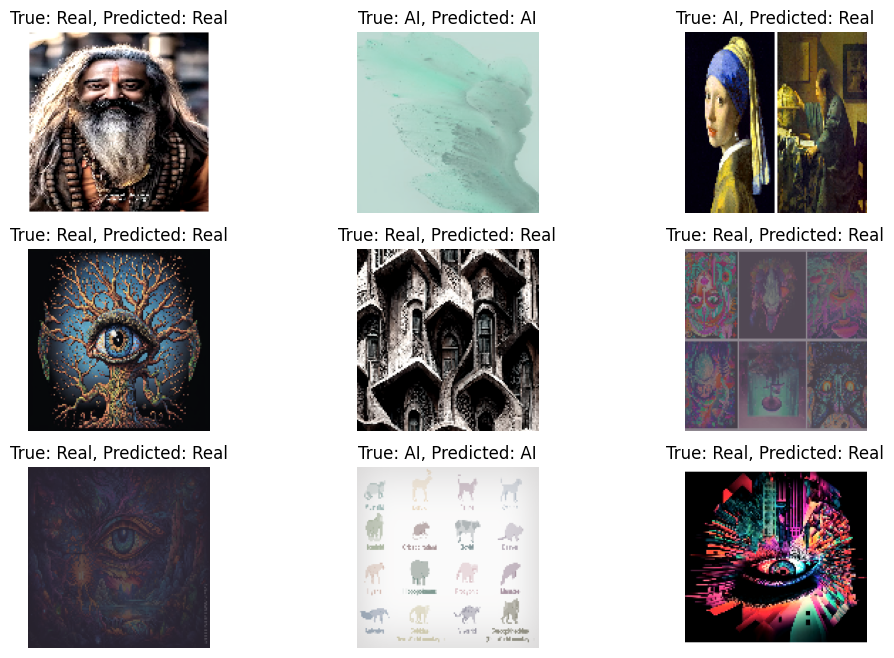

In [4]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

# DATA PATH
ai_image_dir = r"/kaggle/input/ai-generated-images-vs-real-images/AiArtData/AiArtData"
real_image_dir = r"/kaggle/input/ai-generated-images-vs-real-images/RealArt/RealArt"

#  FUNCTION TO LOAD AND PREPROCESS IMAGE
def preprocess_image(image_path, target_size=(128, 128)):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, target_size)
    image = tf.image.random_flip_left_right(image)  
    image = tf.image.random_flip_up_down(image)     
    image = tf.image.random_brightness(image, max_delta=0.2)  
    image = tf.image.random_contrast(image, lower=0.2, upper=1.8)  
    image = tf.image.random_saturation(image, lower=0.2, upper=1.8)  
    image = tf.image.random_hue(image, max_delta=0.1) 
    image = tf.clip_by_value(image, 0, 255)  
    image = image / 255.0  
    return image

#FUNCTION TO LOAD IMAGE FROM DIRECTORY  AND PREPROCESS THEM 
def load_and_preprocess_images(image_dir):
    image_paths = [os.path.join(image_dir, filename) for filename in os.listdir(image_dir)]
    images = [preprocess_image(image_path) for image_path in image_paths]
    return images

#LOAD AND PREPROCESS AI-GENERATED IMAGES 
ai_images = load_and_preprocess_images(ai_image_dir)
ai_labels = np.ones(len(ai_images))  # LABEL SET 1 FOR AI 

#LOAD AND PREPROCESS REAL IMAGE
real_images = load_and_preprocess_images(real_image_dir)
real_labels = np.zeros(len(real_images))  # LABEL SET 0 FOR REAL

# COMBINE AI GENERATED AND REAL IMAGES
images = ai_images + real_images
labels = np.concatenate([ai_labels, real_labels])

# CONVERT LABEL TO ONE HOT ENCODING 
encoder = OneHotEncoder(sparse=False)
labels = encoder.fit_transform(labels.reshape(-1, 1))

# CONVERT IMAGES AND LABEL TO NUMPY ARRAYS 
images = np.array(images)
labels = np.array(labels)

#SHUFFLE IMAGES AND LABELS
indices = np.arange(len(images))
np.random.shuffle(indices)
images = images[indices]
labels = labels[indices]

from sklearn.model_selection import train_test_split

# SPLIT DATA INTO TRAIN AND TESTING SET
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# BULID THE CNN MODEL
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # OUTPUT LAYER WITH  2 NEURONS for AI vs. Real CLASSIFICATION
])

# COMPILE THE MODEL
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# PRINT MODEL SUMMARY
model.summary()


# TRAIN THE MODEL
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

#EVALUATE THE MODEL ON THE TEST SET
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# MAKE PREDICTION ON TEST SET
predictions = model.predict(X_test)



import matplotlib.pyplot as plt
import numpy as np

# DEFINE CLASS LABEL
class_labels = ['AI', 'Real']

#FUNCTION TO PLOT IMAGES WITH THEIR PREDICTED LABELS 
def plot_classified_images(images, labels_true, labels_pred, class_labels):
    plt.figure(figsize=(12, 8))
    for i in range(9):  # SHOW THE 1ST 9 IMAGES
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(f"True: {class_labels[np.argmax(labels_true[i])]}, Predicted: {class_labels[np.argmax(labels_pred[i])]}")
        plt.axis('off')
    plt.show()

# SHOW CLASSIFIED IMAGES
plot_classified_images(X_test, y_test, predictions, class_labels)

